Load the `tidyverse` and the 🐧`palmerpenguins`🐧 packages.

In [2]:
#each point is normalized (each length divided by the average lenght)


library('tidyverse')
library('palmerpenguins')

In [3]:
penguins %>% head

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [5]:
penguins_longer = 
    penguins %>%
        mutate(id = row_number()) %>%
            pivot_longer(cols = c(bill_length_mm, bill_depth_mm, flipper_length_mm), names_to = 'label') #c(..) allows us to specify a series of value
penguins_longer  %>% head

species,island,body_mass_g,sex,year,id,label,value
<fct>,<fct>,<int>,<fct>,<int>,<int>,<chr>,<dbl>
Adelie,Torgersen,3750,male,2007,1,bill_length_mm,39.1
Adelie,Torgersen,3750,male,2007,1,bill_depth_mm,18.7
Adelie,Torgersen,3750,male,2007,1,flipper_length_mm,181.0
Adelie,Torgersen,3800,female,2007,2,bill_length_mm,39.5
Adelie,Torgersen,3800,female,2007,2,bill_depth_mm,17.4
Adelie,Torgersen,3800,female,2007,2,flipper_length_mm,186.0


In [37]:
# We need to create Normalized values for each of these groups
penguins_adjust = 
penguins_longer %>% 
        group_by(label) %>%
            na.omit() %>%
                mutate(Normalized_Value = (value/max(value)))
#             mutate(sum = sum(value)) %>% 
        

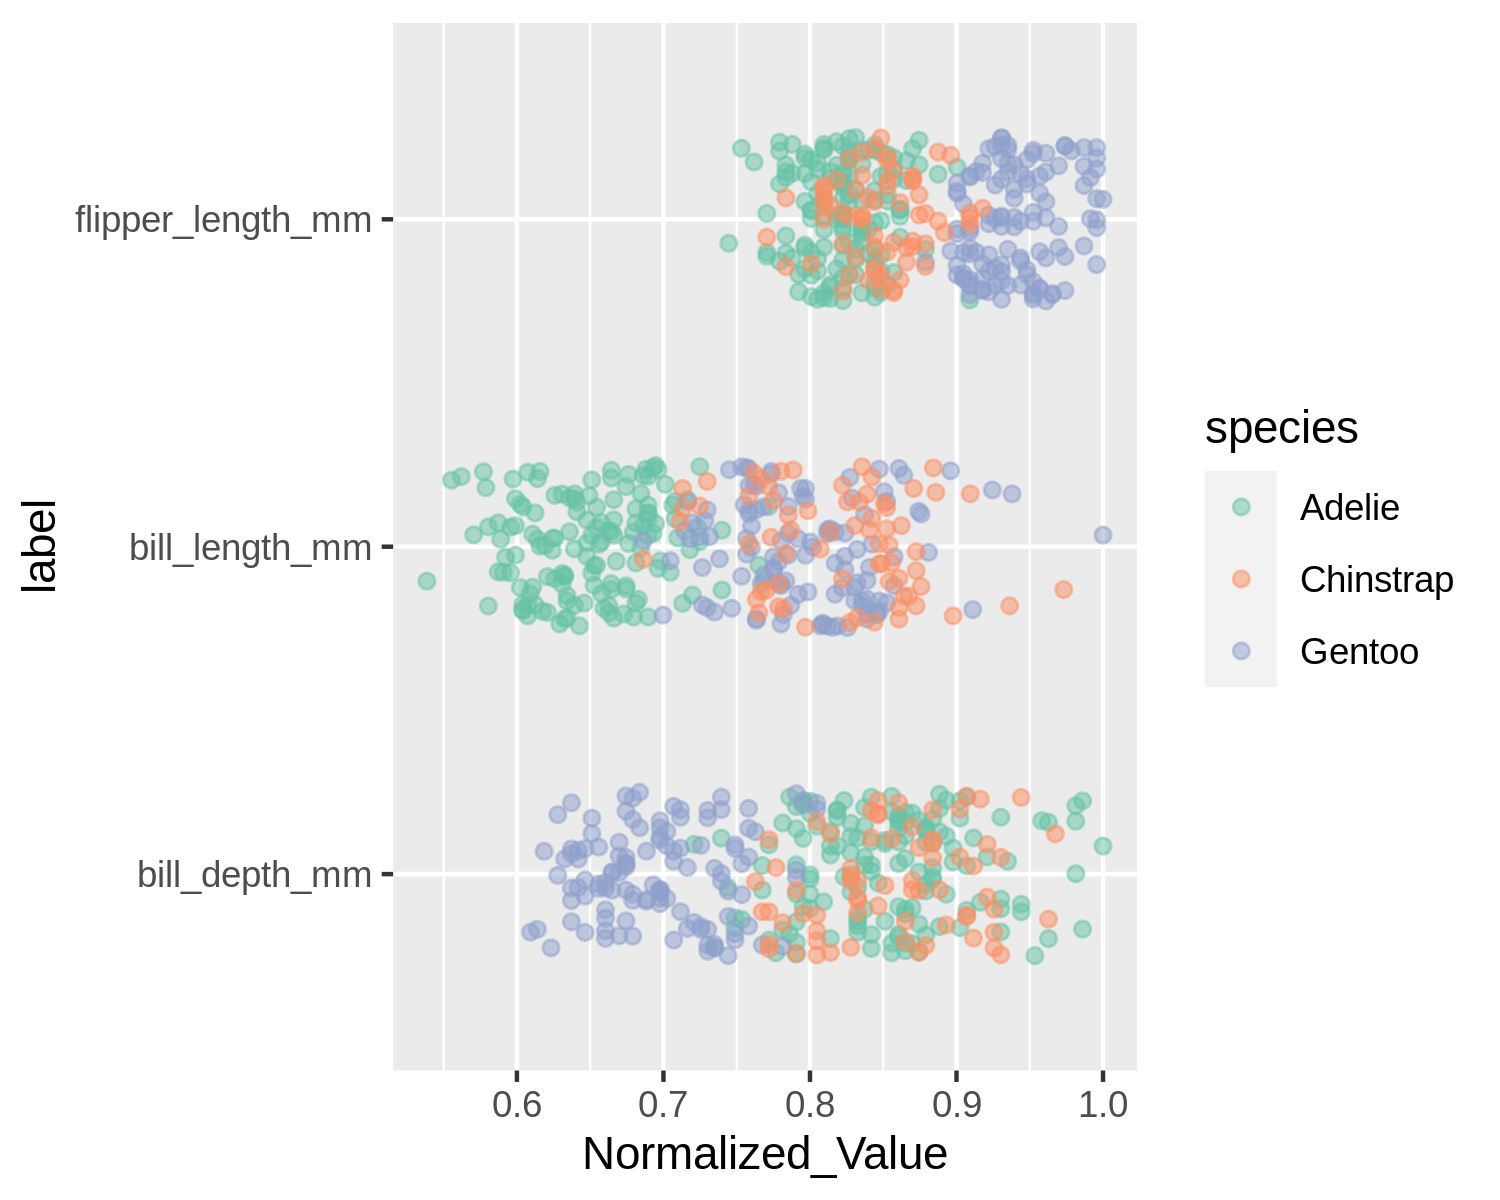

In [38]:
p = ggplot(penguins_adjust, aes(x = Normalized_Value, y = label, color = species))

p = p + geom_point(position = position_jitter(h = 0.25, w = 0), alpha = 0.5) #This is where he did NA.RM = TRUE

p = p + scale_color_brewer(palette = 'Set2')

p

We want to make a jitter chart of normalized penguin length measurements (e.g. `bill_depth_mm`). 

Like this:

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_00_pivot_chart.png?raw=true)

...but our data is not in the right "shape."

Use `pivot_longer` to re-shape the data to create the chart above 👆. 

Then, calculate a normalized value for each measurement by dividing measurement values by the maximum value for each by measurement type (e.g. `bill_depth_mm` is a "measurement type") and capture this new value in a new column with `mutate`.

Now make the chart.